#Dataset Information:
**Name: Bank_Personal_Loan_Modelling.xlsx**

Domain: Banking

**Aim: To classify in order to predict the likelihood of a liability bank customer for buying personal loan.**

#Learning Outcomes:
Exploratory Data Analysis

Preparing the data to train a model

Training and making predictions using a classification model

Model evaluation

#Context:
Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


**On the dataset**

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign



#Analyzing the data distribution of each attribute and listing the relevant findings
In this section, we will use Exploratory Data Analysis (EDA) tools and Applied Statistics concepts to verify the significance of each independent attribute towards predicting probability of a cutomer for buying the personal loan.

In [1]:
!pip install xlrd

In [3]:
#importing important libraries
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
import pylab as pl

from scipy.stats import zscore

In [20]:
#uploading excel sheet from local drive
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


In [22]:
#Importing data in dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))

In [23]:
#checking number of rows and columns
df.shape

(5000, 14)

In [30]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
#Viewing first few rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Information on the features or attributes**

The attributes can be divided accordingly :

The **variable ID** does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

**The binary category have five variables as below:**

Personal Loan - Did this customer accept the personal loan offered in the last campaign?  **This is our target variable**

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?

Credit Card - Does the customer use a credit card issued by UniversalBank?

**Interval variables are as below:**

Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage

**Ordinal Categorical Variables are:**

Family - Family size of the customer

Education - education level of the customer

**The nominal variable is :**

ID

Zip Code




In [25]:
#checking for null values
df.isnull().values.any()

False

In [34]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

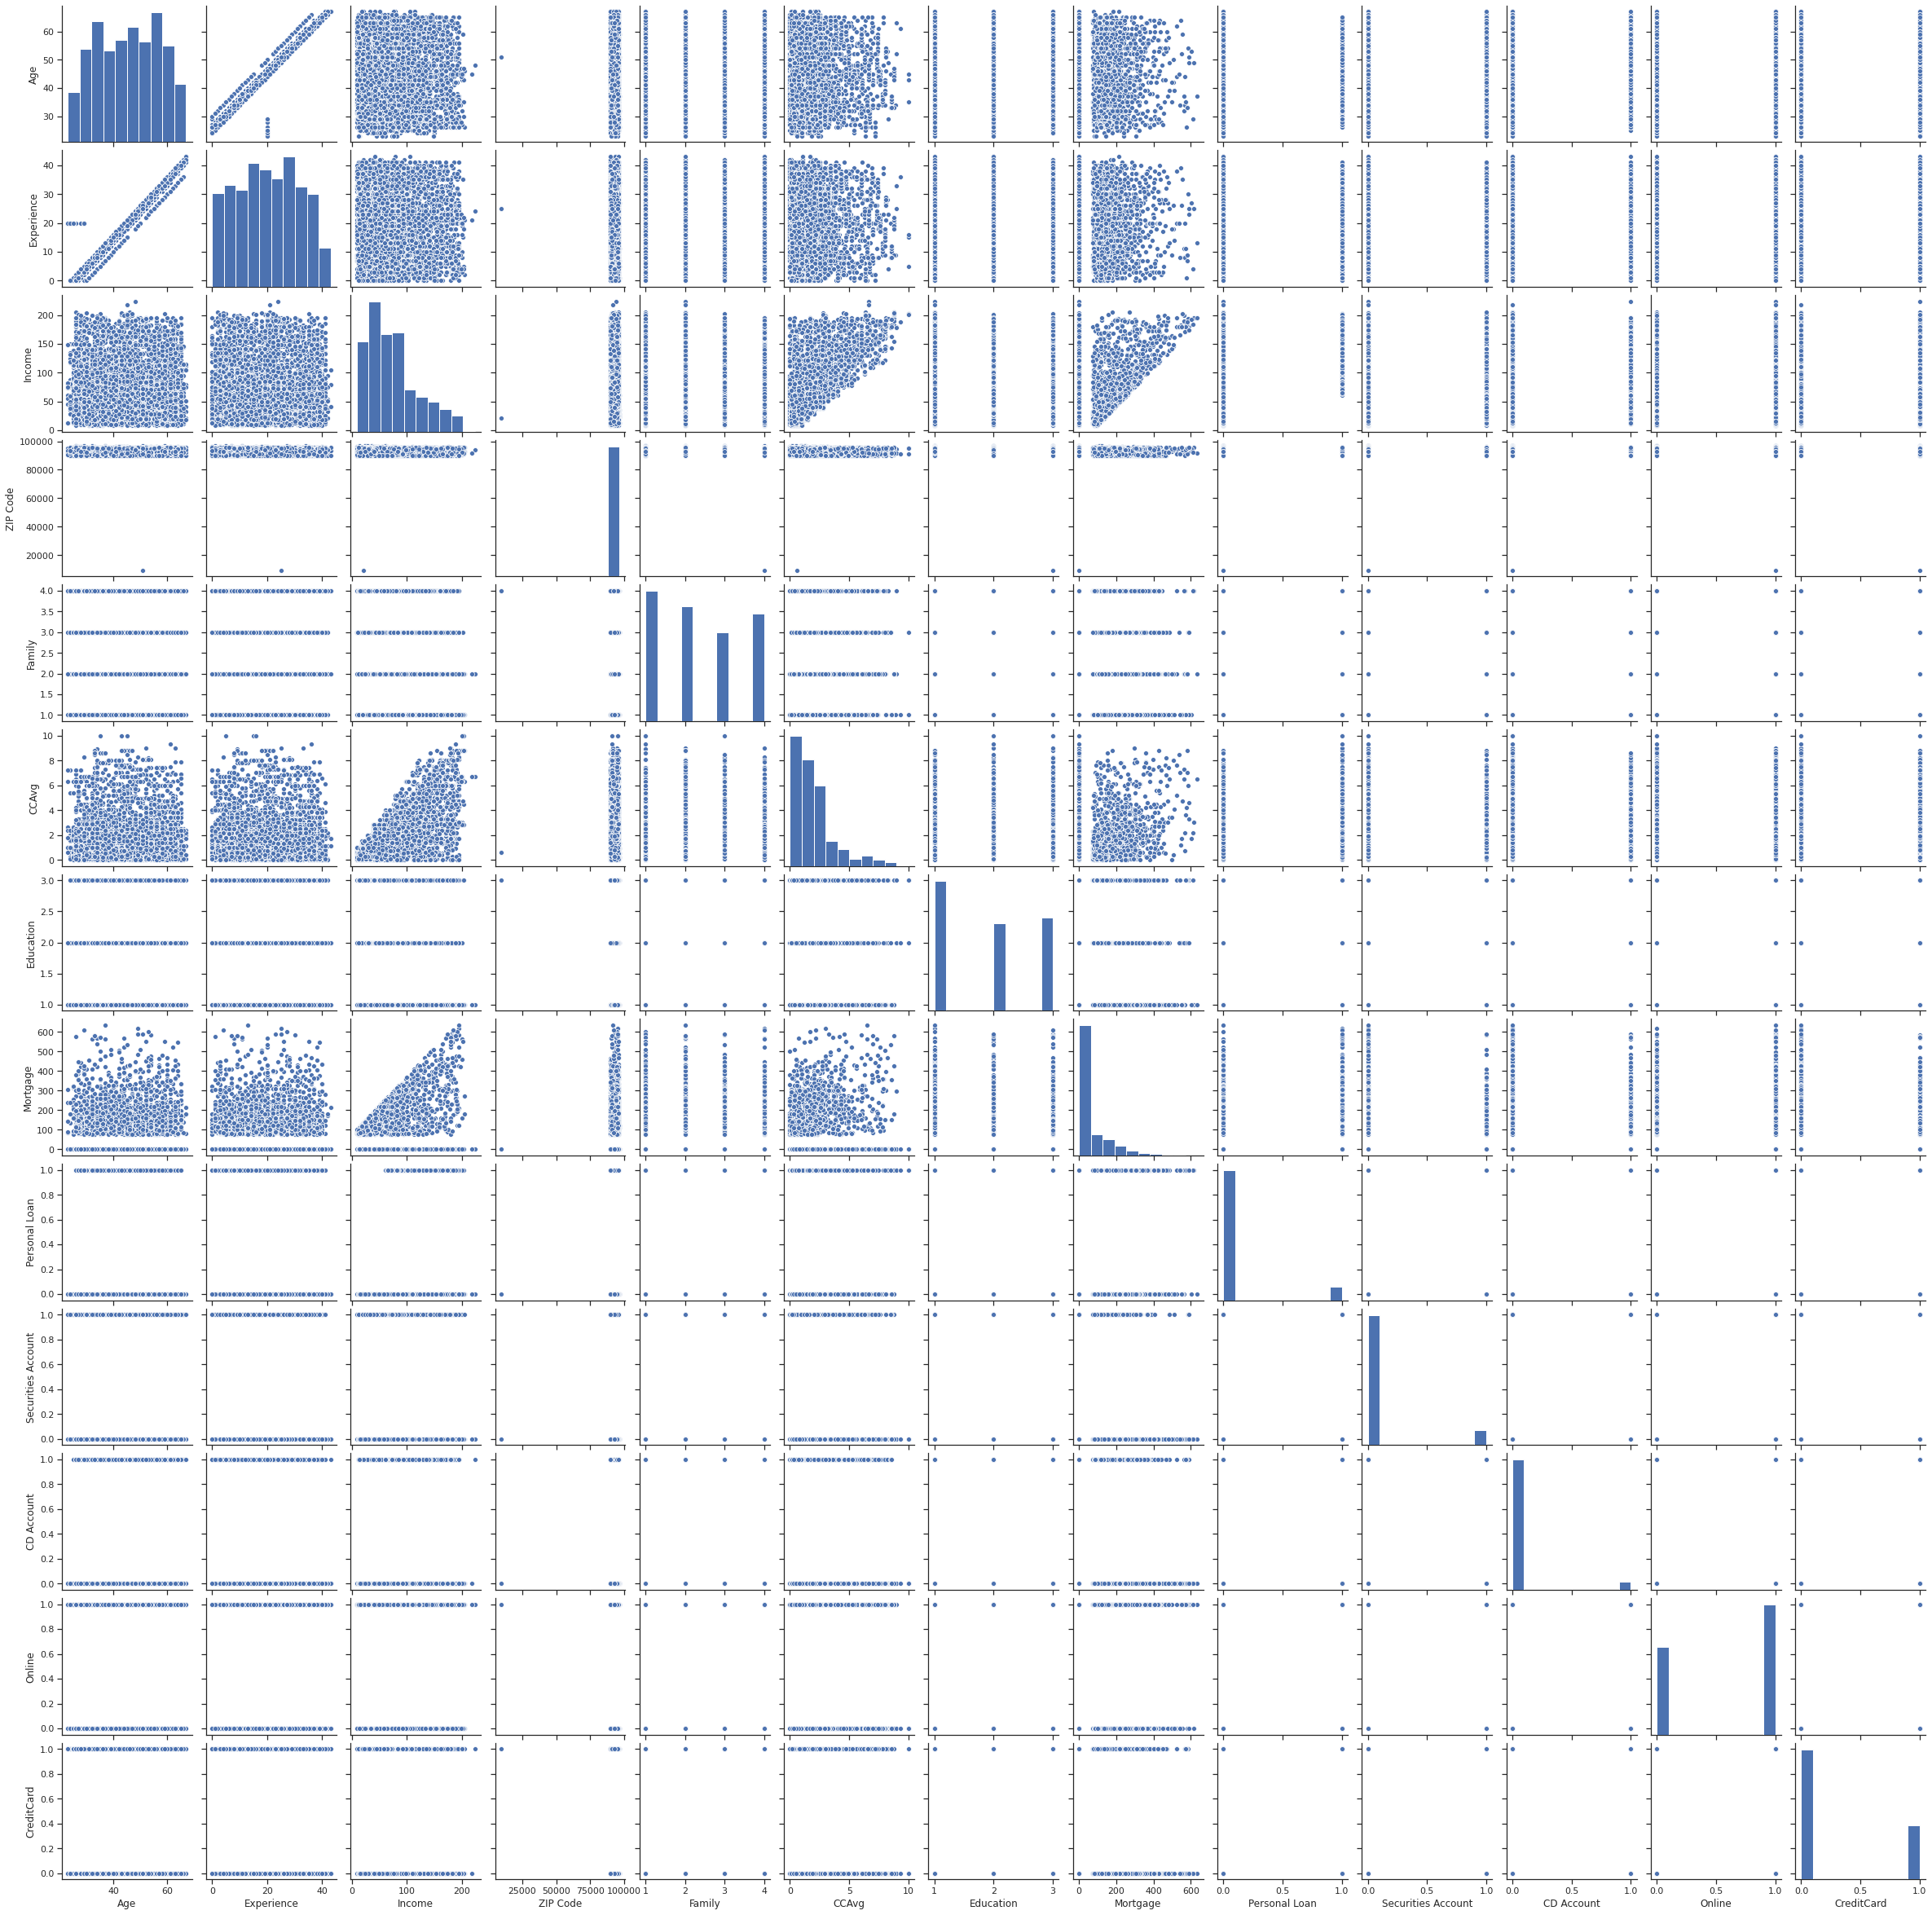

In [35]:
sns.pairplot(df.iloc[:,1:])

**Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows **mean** is almost equal to **median**

**Experience** is normally distributed with more customer having experience starting from 8 years. Here the **mean** is equal to **median**. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the **mean** is greater than the **median**

**CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

**Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [27]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observation on given data
#### we have few negative values in experience which we need to have look at and update to median/mean.
# I will prefer to median.
### let's correct the data first then move on

In [32]:
df['Experience'].mask(df['Experience'] < 0, df.Experience.median(), inplace=True)

In [33]:
#again check for negative values
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


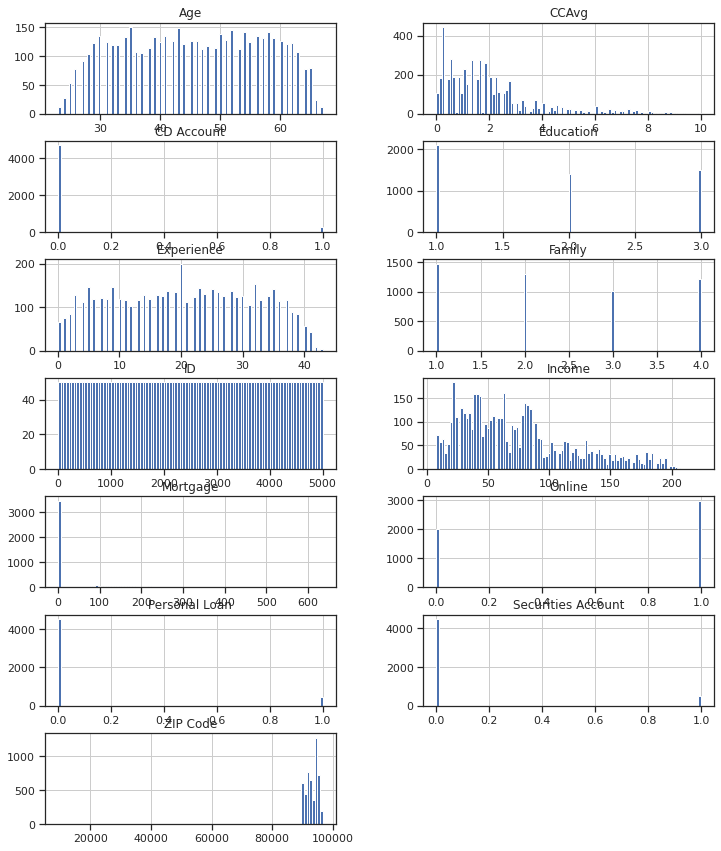

In [36]:
columns = list(df)[0:-1]
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

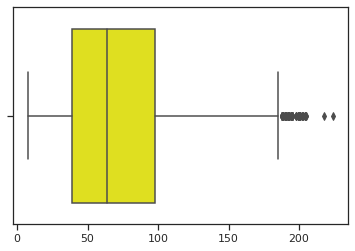

In [42]:
sns.boxplot(df[['Income']],color='yellow')

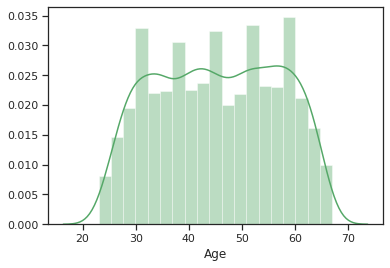

In [38]:
sns.distplot( df['Age'], color = 'g')

## **Observation**
# Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls
# in the range of 5 to 35 years and most earn an income between 10K to 100K.
# **lets check the influence of Income level on whether a customer takes a personal loan across the education levels**

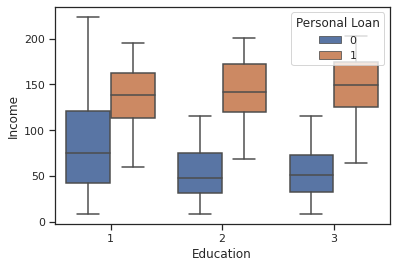

In [39]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

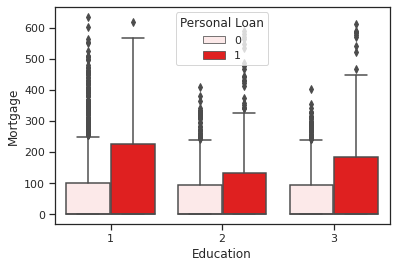

In [41]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df,color='red')

**Inference** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

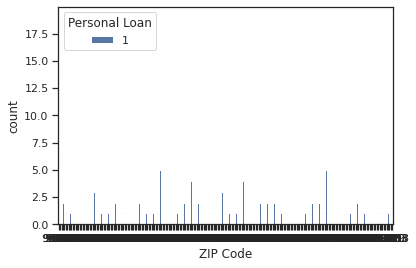

In [43]:
sns.countplot(x="ZIP Code", data=df[df["Personal Loan"] ==1], hue ="Personal Loan",orient ='v')

In [44]:
# top 10 locations who appled personal loan before

zipcode_top10 = df[df["Personal Loan"]==1]['ZIP Code'].value_counts().head(10)
zipcode_top10


94720    19
94305    13
92093     9
90095     8
90089     8
94304     8
92182     7
94022     6
95051     6
95616     6
Name: ZIP Code, dtype: int64

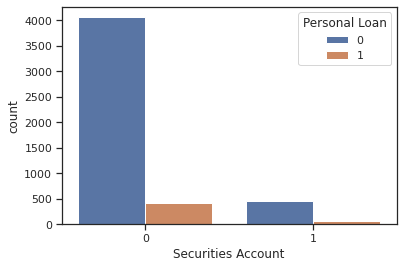

In [46]:
sns.countplot(x="Securities Account", data=df, hue="Personal Loan")

**Observation** : Majority of customers who does not have loan have securities account

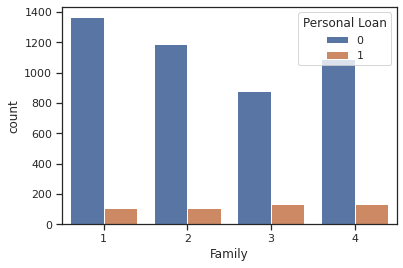

In [47]:
sns.countplot(x="Family", data=df,hue="Personal Loan")

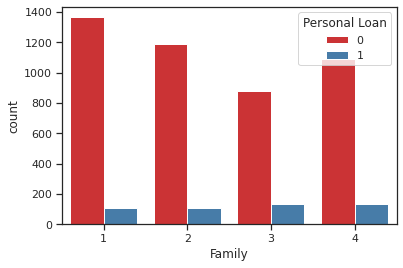

In [48]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

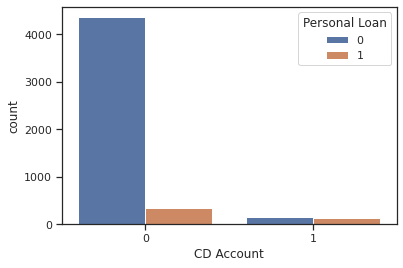

In [49]:
sns.countplot(x="CD Account", data=df,hue="Personal Loan")

**Observation:** Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

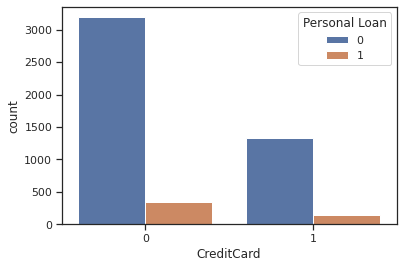

In [50]:
sns.countplot(x="CreditCard", data=df, hue="Personal Loan")

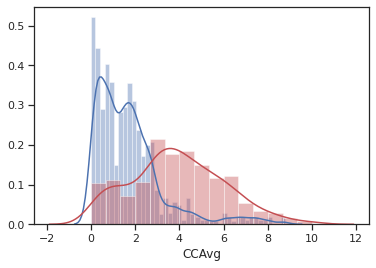

In [55]:
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'r')

In [54]:
print('Credit card spending of Non-Loan customers: ',df[df["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df["Personal Loan"] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation:** The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

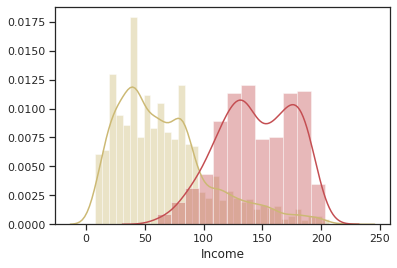

In [56]:
sns.distplot( df[df["Personal Loan"] == 0]['Income'], color = 'y')
sns.distplot( df[df["Personal Loan"] == 1]['Income'], color = 'r')

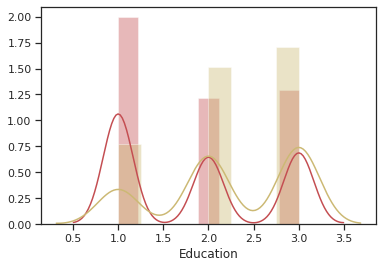

In [57]:
sns.distplot( df[df["Personal Loan"] == 0]['Education'], color = 'r')
sns.distplot( df[df["Personal Loan"] == 1]['Education'], color = 'y')

# Correlation Check

In [58]:
# It will show correlation matrix
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.048730,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


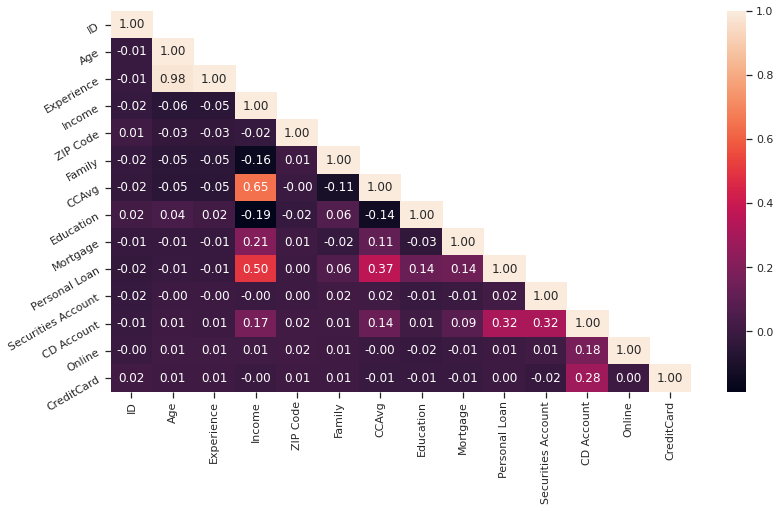

In [59]:
 #However we want to see correlation in graphical representation so below is function for that
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#**Observation**

#Income and CCAvg is moderately correlated.
#Age and Experience is highly correlated

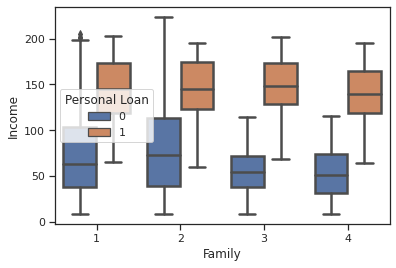

In [60]:
sns.boxplot(x=df.Family,y=df.Income,hue=df["Personal Loan"])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

# **Applying Models**

Train and Test Data

In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [63]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

#Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score, classification_report


In [107]:
#create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(train_set,train_labels)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(test_set)
# get accuracy of model
lr_acc_score = accuracy_score(test_labels,y_pred)
# get F1-score of model
lr_f1_score = f1_score(test_labels,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(test_labels,y_pred)
# get the classification report
lr_classrep = classification_report(test_labels,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 90.0 %
The f1-score of the model is 38.01652892561984 %
The confusion matrix for logistic regression is: 
 [[1304   38]
 [ 112   46]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.55      0.29      0.38       158

    accuracy                           0.90      1500
   macro avg       0.73      0.63      0.66      1500
weighted avg       0.88      0.90      0.89      1500



# Random Forest Classifier

In [83]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

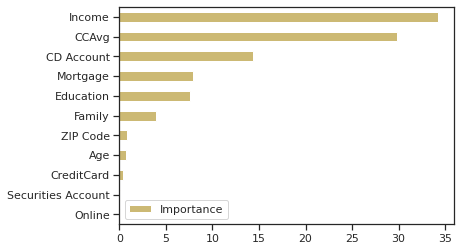

In [68]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y', )

In [87]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)


0.904

In [88]:

print(metrics.confusion_matrix(test_labels, predicted_random))

[[1342    0]
 [ 144   14]]


# KNN ( K - Nearest Neighbour )

In [69]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [94]:
print(metrics.confusion_matrix(Y_Test, predicted))

[[1359   14]
 [ 120    6]]


#Naive Bayes

In [89]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [90]:
print(metrics.confusion_matrix(test_labels, prediction))

[[1234  108]
 [  62   96]]


# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [77]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [95]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[1336    6]
 [  28  130]]


In [78]:
test_set.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


#Model Comparison

In [98]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.898600 (0.008902)
Decisiontree: 0.981800 (0.004512)
NB: 0.885600 (0.010385)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.985200 (0.004214)


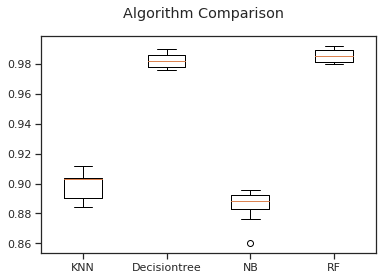

In [100]:
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decisiontree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#**Conclusion**
The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Logisticc Regressin and four classification algorithms were used in this study. From the above graph , 
it seems like **Decision Tree** algorithm have the highest accuracy and we can choose that as our final model.